# Project: Sports Wear Group Sales Dataset - Data Science

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#eda">Data Modeling</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> This dataset belongs to a Sports Wear Group that wants to leverage advanced analytics for boosting marketing campaign. This data represents information from a marketing campaign about the product in the campaign/offer that was send to a specific customer and the convergence 
result of this campaign (label attribute).

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

## Data Wrangling

In [2]:
df = pd.read_csv("/Ahmed Tarek - full_gen_data - Ahmed Tarek - full_gen_data.csv")
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [3]:
df['category'].head()

0        TRAINING
1        TRAINING
2            GOLF
3         RUNNING
4    RELAX CASUAL
Name: category, dtype: object

In [4]:
df.shape

(100000, 24)

The dataset consists of 100,000 rows and 24 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  int64  
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [6]:
df.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label'],
      dtype='object')

In [7]:
df.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,56.781800,52.391200,28.290800,0.545646,0.061900,0.004900,2721.726500,6.517000,161.400000,139.600000,133.500000,207.700000,181.400000,209.900000,0.13928
std,87.934743,35.272128,22.578343,0.194363,0.240975,0.069829,1908.085499,3.914728,39.790147,63.641814,81.148727,35.313205,23.474359,45.306849,0.34624
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,1.000000,1.290000,79.000000,26.000000,0.000000,164.000000,155.000000,155.000000,0.00000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,1017.000000,2.290000,138.000000,104.000000,57.000000,164.000000,155.000000,155.000000,0.00000
50%,26.000000,40.950000,20.950000,0.525044,0.000000,0.000000,2091.000000,6.950000,160.000000,144.000000,143.000000,205.000000,187.000000,238.000000,0.00000
75%,64.000000,79.950000,37.950000,0.699248,0.000000,0.000000,4570.250000,9.600000,205.000000,181.000000,205.000000,255.000000,211.000000,255.000000,0.00000
max,898.000000,197.950000,195.950000,1.000000,1.000000,1.000000,5999.000000,13.290000,205.000000,238.000000,250.000000,255.000000,211.000000,255.000000,1.00000


In [8]:
df.isnull().sum()

country           0
article           0
sales             0
regular_price     0
current_price     0
ratio             0
retailweek        0
promo1            0
promo2            0
customer_id       0
article.1         0
productgroup      0
category          0
cost              0
style             0
sizes             0
gender            0
rgb_r_main_col    0
rgb_g_main_col    0
rgb_b_main_col    0
rgb_r_sec_col     0
rgb_g_sec_col     0
rgb_b_sec_col     0
label             0
dtype: int64

There are no NaN values

In [9]:
df.duplicated().sum()

0

There are no duplicated rows

In [10]:
# Getting unique values of each column in the dataset
for i in df.columns:
  print(i, "\n", df[i].unique(), "\n")

country 
 ['Germany' 'Austria' 'France'] 

article 
 ['YN8639' 'CF3238' 'WR9459' 'EF2771' 'LX1494' 'VF6733' 'YK5786' 'CX1431'
 'TK4862' 'ZM8792' 'LU3394' 'IW7978' 'XG3252' 'UM7314' 'XG6449' 'ZJ5718'
 'LI3529' 'KO9295' 'GJ5184' 'UJ4517' 'BU9681' 'CR8478' 'VK4838' 'AA7884'
 'BY9685' 'UX6851' 'FF7283' 'CB8861' 'FE4648' 'BC1489' 'PQ6953' 'WO1329'
 'LH8921' 'TS8795' 'LI6472' 'CA2199' 'WK5365' 'QS5396' 'TM4166' 'BF7459'
 'JY1298' 'MP6772' 'AZ5221' 'MR4948' 'UD3728' 'VT7698' 'DI9187' 'OZ8992'
 'UB1117' 'TN5256' 'BE9148' 'FU5676' 'ST3419' 'ZK4922' 'FJ2121' 'KT8964'
 'RO5412' 'BS7795' 'QP2819' 'GW8244' 'AP5568' 'PP8845' 'GC8114' 'MJ2618'
 'ZC7213' 'GD2286' 'RN5619' 'EN9438' 'PZ7731' 'LR5226' 'BM9116' 'LD8468'
 'ML2223' 'NQ1161' 'GT5685' 'QU7755' 'GA4832' 'HM5731' 'EH5694' 'ZV2187'
 'KF6572' 'IR3275' 'MO9371' 'AA8941' 'PN1714' 'LX5583' 'IA4131' 'PV1343'
 'WP4135' 'CY6963' 'VY6942' 'FB5424' 'PQ6773' 'PW6278' 'VA9789' 'IF7337'
 'XB1815' 'VL9749' 'CC8861' 'DM6271' 'ZZ2466' 'QX5316' 'OP1184' 'ON6325

<a id='eda'></a>
## Exploratory Data Analysis

<Axes: >

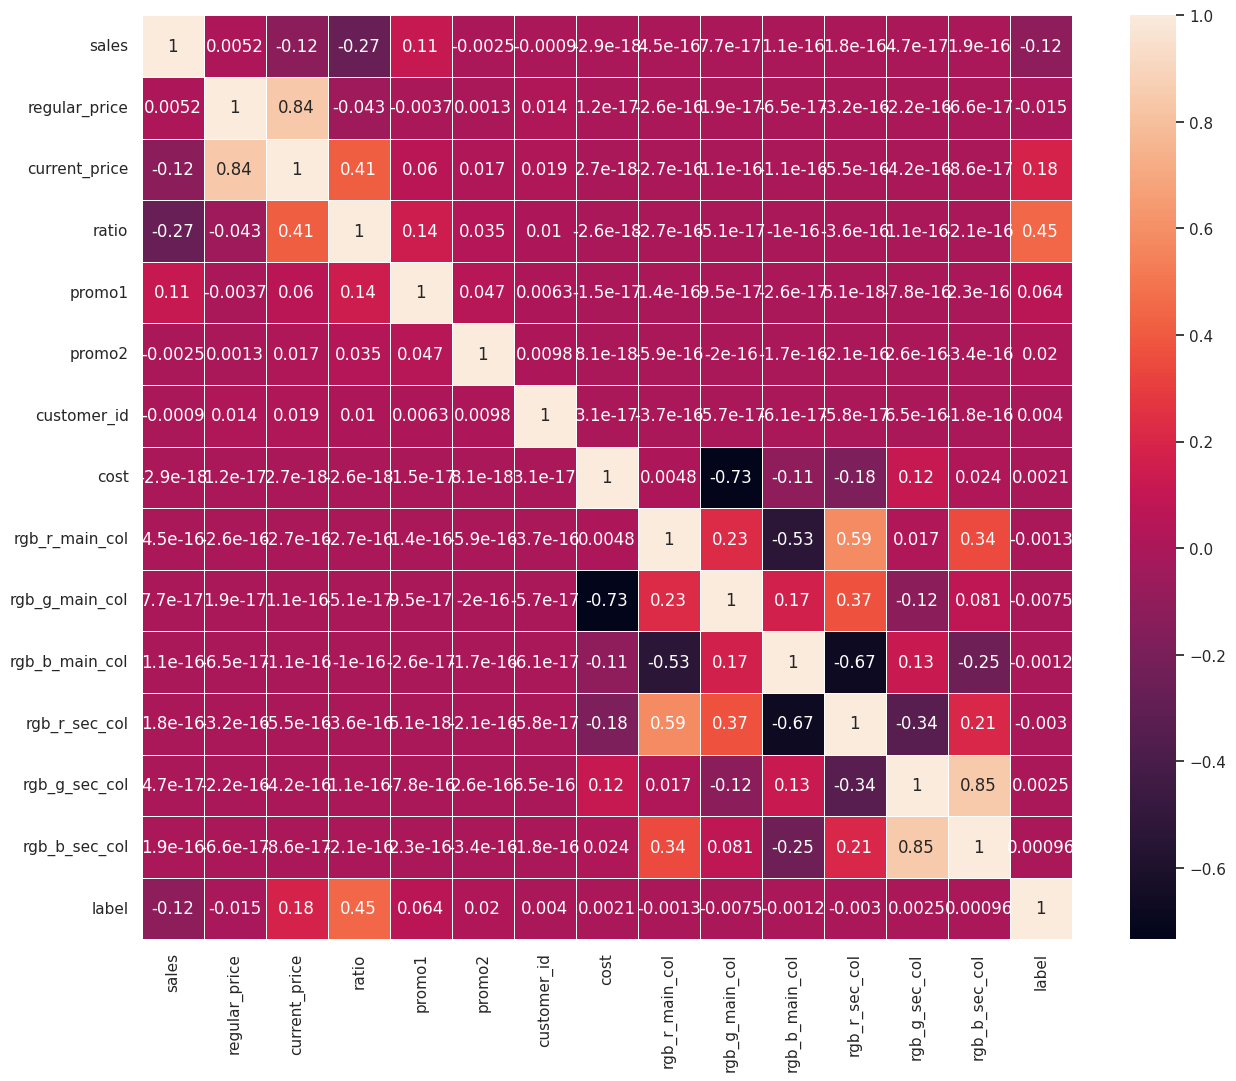

In [11]:
# Showing correlation in the dataset
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, linewidth=.5)

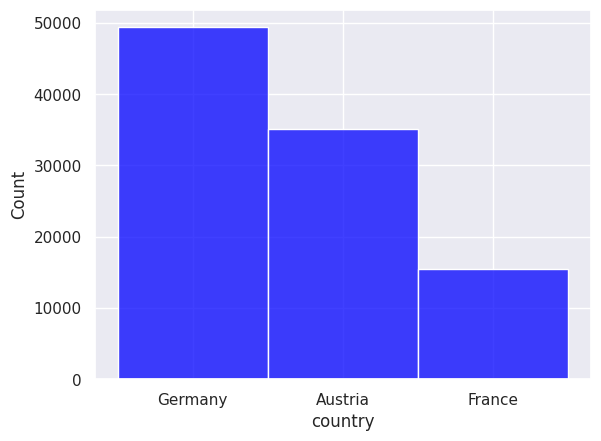

In [12]:
sns.histplot(data=df, x="country", binwidth=3, color='blue')
plt.show();

Germany is the highest country; while France is the lowest

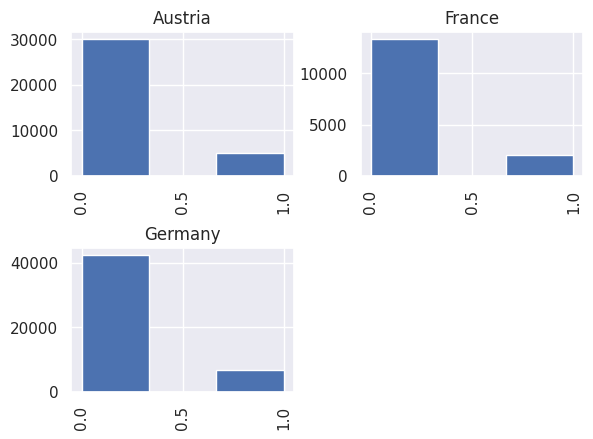

In [13]:
df['label'].hist(df['country'], bins=3, color='b')
plt.show();

Germany's headquarters has the highest count in which customers don't buy their products

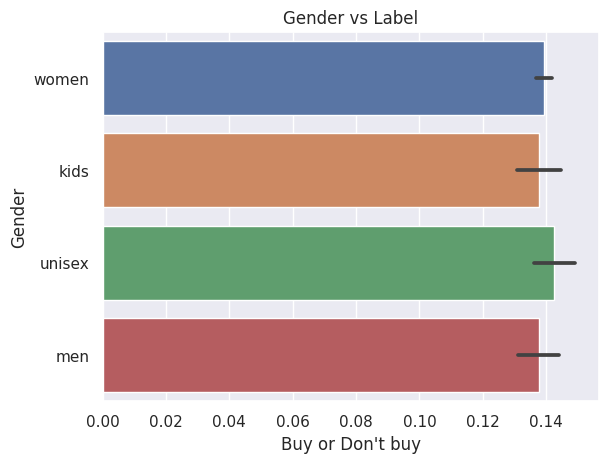

In [14]:
sns.barplot(x = 'label',y = 'gender',data = df)
#Adding the aesthetics
plt.title('Gender vs Label')
plt.xlabel("Buy or Don't buy")
plt.ylabel('Gender') 
# Show the plot
plt.show()

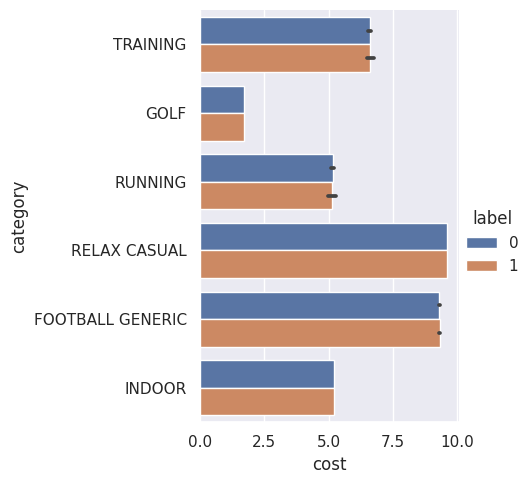

In [15]:
sns.catplot(data=df, x="cost", y="category", hue="label", kind="bar")
plt.show();

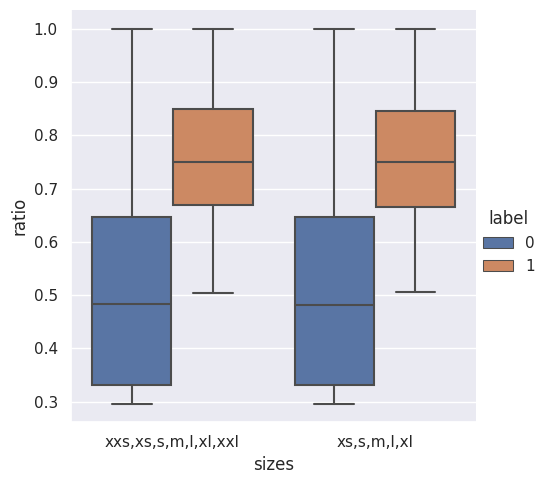

In [16]:
sns.catplot(data=df, x="sizes", y="ratio", hue="label", kind="box")
plt.show();

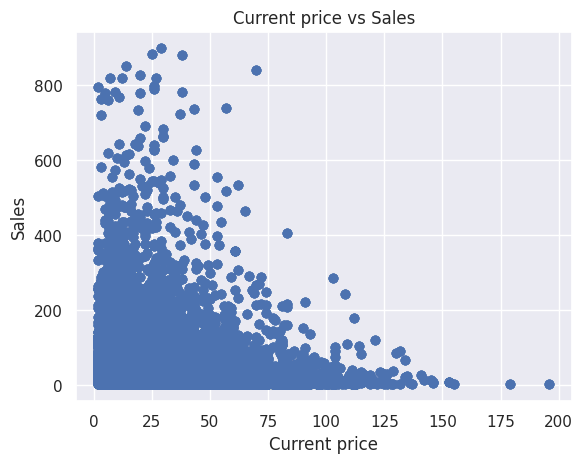

In [17]:
plt.scatter(df['current_price'],df['sales'],alpha=0.5 )
#Adding the aesthetics
plt.title('Current price vs Sales')
plt.xlabel('Current price')
plt.ylabel('Sales') 
#Show the plot
plt.show()

It appears that there is negative correlation between the current price and the number of units sold

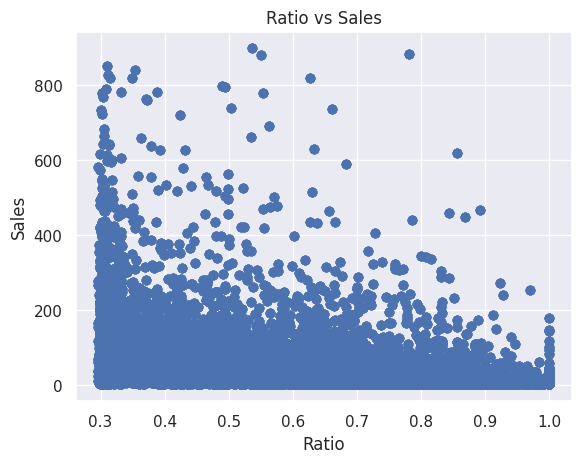

In [18]:
plt.scatter(df['ratio'],df['sales'],alpha=0.5 )
#Adding the aesthetics
plt.title('Ratio vs Sales')
plt.xlabel('Ratio')
plt.ylabel('Sales') 
#Show the plot
plt.show()

No clear correlation

In [19]:
! pip install webcolors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from scipy.spatial import KDTree
from webcolors import (
    CSS3_HEX_TO_NAMES,
    hex_to_rgb,
)
def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return f'{names[index]}'

In [21]:
# Example for clarification
print(convert_rgb_to_names((250,187,0)))

orange


In [22]:
# applying color function to each row in the data
color_primary=[]
color_secondary=[]

for i in range(len(df)):
  color_primary.append(convert_rgb_to_names(tuple([df['rgb_r_main_col'][i],df['rgb_g_main_col'][i],df['rgb_b_main_col'][i]])))
  color_secondary.append(convert_rgb_to_names(tuple([df['rgb_r_sec_col'][i],df['rgb_g_sec_col'][i],df['rgb_b_sec_col'][i]])))

df['primary_color'] = color_primary
df['secondary_color'] = color_secondary

In [23]:
df['primary_color'].value_counts()

chocolate       10000
darkkhaki       10000
goldenrod       10000
rosybrown       10000
blueviolet      10000
steelblue       10000
brown           10000
lightskyblue    10000
silver          10000
gray            10000
Name: primary_color, dtype: int64

There are 10 primary colors

In [24]:
df['secondary_color'].value_counts()

rosybrown    40000
lavender     30000
lightblue    30000
Name: secondary_color, dtype: int64

There are only 3 secondary colors

In [25]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,primary_color,secondary_color
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,...,women,205,104,57,255,187,255,0,chocolate,lavender
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,...,women,188,238,104,255,187,255,0,darkkhaki,lavender
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,...,women,205,173,0,255,187,255,0,goldenrod,lavender
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,...,kids,205,140,149,164,211,238,0,rosybrown,lightblue
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,...,women,138,43,226,164,211,238,0,blueviolet,lightblue


In [26]:
# Dropping the unneeded columns related to colors
df = df.drop(['rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col', 'rgb_g_sec_col', 'rgb_b_sec_col'], axis=1)

In [27]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,label,primary_color,secondary_color
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,0,chocolate,lavender
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,0,darkkhaki,lavender
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,0,goldenrod,lavender
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,0,rosybrown,lightblue
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,0,blueviolet,lightblue


In [28]:
len(df.columns)

20

In [29]:
# Dropping the unneeded columns
df = df.drop(['regular_price', 'promo2', 'customer_id', 'article'], axis=1)

<a id='model'></a>
## Data Modeling

### Splitting data into train and test sets

In [30]:
# Encode the categorical column using one hot encoding
df_encoded = pd.get_dummies(df)
df_encoded

,sales,current_price,ratio,promo1,cost,label,country_Austria,country_France,country_Germany,retailweek_2014-12-28,...,primary_color_darkkhaki,primary_color_goldenrod,primary_color_gray,primary_color_lightskyblue,primary_color_rosybrown,primary_color_silver,primary_color_steelblue,secondary_color_lavender,secondary_color_lightblue,secondary_color_rosybrown
0,28,3.95,0.663866,0,13.29,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,28,3.95,0.663866,0,2.29,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,28,3.95,0.663866,0,1.70,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,28,3.95,0.663866,0,9.00,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,28,3.95,0.663866,0,9.60,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,227,26.95,0.465056,0,4.20,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
99996,227,26.95,0.465056,0,9.90,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
99997,227,26.95,0.465056,0,5.20,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
99998,227,26.95,0.465056,0,1.29,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [31]:
x = df_encoded.drop('label', axis=1)
x

,sales,current_price,ratio,promo1,cost,country_Austria,country_France,country_Germany,retailweek_2014-12-28,retailweek_2015-01-04,...,primary_color_darkkhaki,primary_color_goldenrod,primary_color_gray,primary_color_lightskyblue,primary_color_rosybrown,primary_color_silver,primary_color_steelblue,secondary_color_lavender,secondary_color_lightblue,secondary_color_rosybrown
0,28,3.95,0.663866,0,13.29,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,28,3.95,0.663866,0,2.29,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,28,3.95,0.663866,0,1.70,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,28,3.95,0.663866,0,9.00,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,28,3.95,0.663866,0,9.60,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,227,26.95,0.465056,0,4.20,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
99996,227,26.95,0.465056,0,9.90,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
99997,227,26.95,0.465056,0,5.20,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
99998,227,26.95,0.465056,0,1.29,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [32]:
y = df.loc[:, 'label']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: label, Length: 100000, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Building the model

In [34]:
# Using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Fit the model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
# Prediction
y_pred = rf.predict(x_test)

### Evaluation

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.85015


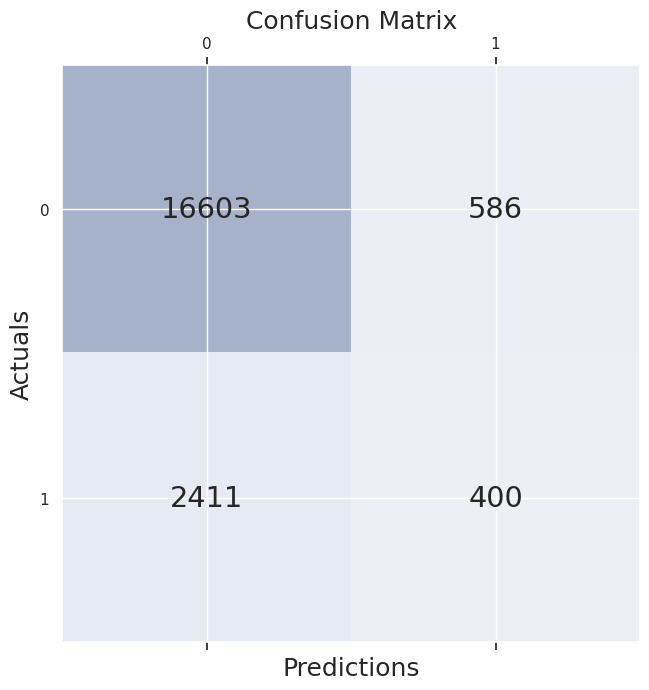

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()